In [75]:
from qiskit import *

In [55]:
nqubits = 3 
circuit = QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

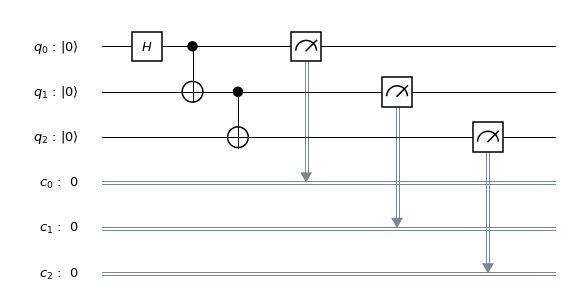

In [56]:
%matplotlib inline
circuit.draw(output='mpl')

In [57]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots = 1024).result()

In [58]:
from qiskit.visualization import plot_histogram

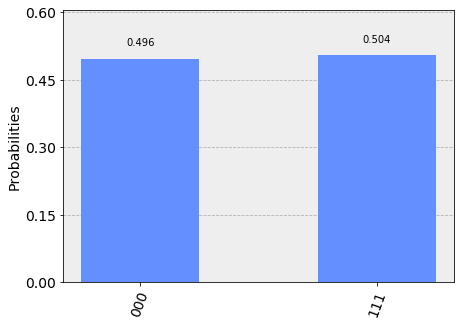

In [59]:
plot_histogram(sim_result.get_counts(circuit))

In [60]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmqx2')

/home/naiph/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


In [61]:
job = execute(circuit, backend = device, shots = 1024)
print(job.job_id())

from qiskit.tools.monitor import job_monitor
job_monitor(job)

5db68969c5bfb60012217218
Job Status: job has successfully run


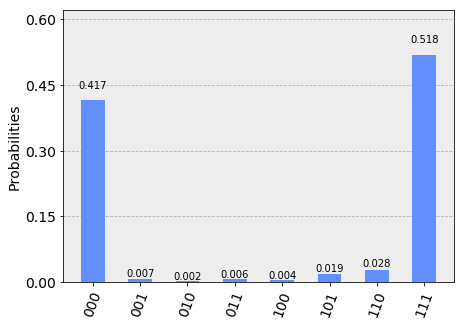

In [62]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

Here we see the difference between running a task on a simulator Vs running it on a real quantum device
We see some error here. Let's try to correct it using ignis

In [63]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [64]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

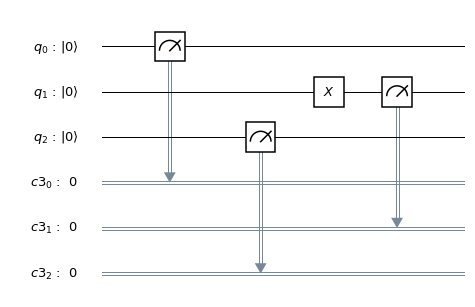

In [65]:
cal_circuits[2].draw(output='mpl')

In [66]:
len(cal_circuits)

8

In [67]:
cal_job = execute(cal_circuits,
                 backend = device,
                 shots = 1024,
                 optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5db68a2cdf5c960012246350
Job Status: job has successfully run


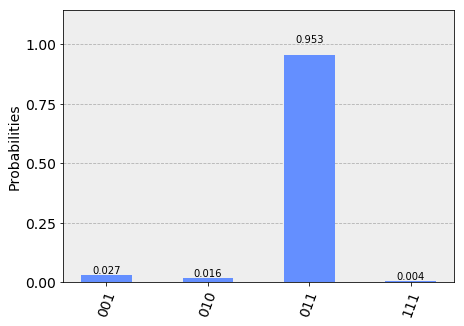

In [68]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [70]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

QiskitError: 'Data for experiment "cal_000" could not be found.'

Cannot solve the above error -> 'Data for experiment "cal_000" could not be found'

Here's the link to the original code: https://github.com/Qiskit/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep8_Noise_and_Error_Mitigation.ipynb